In [1]:
# 1. Write a python program to find the fitted simple linear regression equation for the given data. 
#    Compare the coefficients obtained from sklearn model with your program.
#    Compute the error, MSE and RMSE. Predict the gold price with the year 2025 for 1 gram.

In [54]:
import pandas as pd
gold = pd.read_csv("gold.csv")
gold.head(5)

,Year,Price
0,2022,52950
1,2021,50045
2,2020,48651
3,2019,35220
4,2018,31438


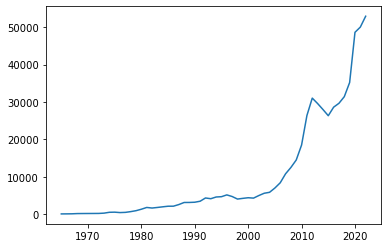

In [55]:
# plot
import matplotlib.pyplot as plt
x = gold.Year
y = gold.Price
plt.plot(x,y)
plt.show()

In [56]:
import numpy as np
def LinearRegression(x,y):
    n = len(x)
    x_sum = x.sum()
    y_sum = y.sum()
    npx = np.array(x)
    npy = np.array(y)
    xSquare = npx**2
    xSquareSum = xSquare.sum()
    xy = npx*npy
    xySum = xy.sum()
    
    b_ = ((n*xySum) - (x_sum*y_sum))/((n*xSquareSum) - (x_sum**2))
    a_ = (y_sum*xSquareSum - x_sum * xySum)/ ((n*xSquareSum) - (x_sum)**2)
    return (a_, b_)

In [57]:
# compute a and b from dataset
a,b = LinearRegression(x,y)
print("Derived Equation: y = ",a,"+",b,"x")

Derived Equation: y =  -1336226.704266511 + 675.343658679135 x


In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
npx = np.array(x)
npy = np.array(y)
npx = npx.reshape(-1, 1)
npy = npy.reshape(-1, 1)
model.fit(npx,npy)
print(model.score(npx,npy))
a = model.intercept_
b = model.coef_
findYear = 2020
predict = a + b*findYear
print(predict)
print(a,b)

0.6710948804187664
[[27967.48626534]]
[-1336226.70426651] [[675.34365868]]


In [59]:
predicted_vals = a+b*npx
residual = np.array(predicted_vals).reshape(-1,1) - npy
MSE = (residual**2).sum()/len(npx)
print("MSE = ",MSE)
RMSE = MSE**(1/2)
print("RMSE = ",RMSE)

MSE =  62644360.72375514
RMSE =  7914.81905818163


In [8]:
print('Price of 10g gold in 2025 = ',end='')
print((a + b*2025) / 10)

Price of 10g gold in 2025 = [[3134.42045587]]


In [9]:
print('Price of 10g gold in 2025 = ',end='')
print((a + b*2024) / 10)

Price of 10g gold in 2025 = [[3066.88609001]]


In [10]:
#2. Consider the Question no 1 gold price with following year-wise silver price. Write a python program
#to find the fitted multiple linear regression equation for the given data.Compare the coefficients obtained 
#from sklearn model with your program. Compute the error, MSE and RMSE. Predict the gold and 
#silver price with the year 2024 for 1 gram.

In [11]:
gs = pd.read_csv('silver.csv')
gs.head(10)

,Year,Gold,Silver
0,2022,52950,55100
1,2021,50045,62572
2,2020,48651,63435
3,2019,35220,40600
4,2018,31438,41400
5,2017,29667,37825
6,2016,28623,36990
7,2015,26343,37825
8,2014,28006,43070
9,2013,29600,54030


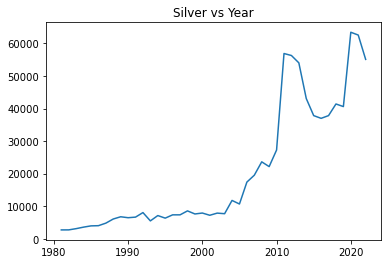

In [12]:
# extract x1, x2 and y
x1 = gs.Year
x2 = gs.Gold
y = gs.Silver
plt.plot(x1,y)
plt.title('Silver vs Year')
plt.show()

In [19]:
def MultipleRegression(x1,x2,y):
    npx1 = np.array(x1)
    npx2 = np.array(x2)
    npy = np.array(y)
    x1sum = x1.sum()
    x2sum = x2.sum()
    ysum = y.sum()
    x1square = npx1**2
    x1squaresum = x1square.sum()
    x2square = npx2**2
    x2squaresum = x2square.sum()
    x1x2 = npx1*npx2
    x1y = npx1*npy
    x2y = npx2*npy
    x1x2sum = x1x2.sum()
    x1ysum = x1y.sum()
    x2ysum = x2y.sum()
    b1 = ((x2squaresum*x1ysum) - (x1x2sum*x2ysum))/((x1squaresum*x2squaresum) - (x1x2sum)**2)
    b2 = ((x1squaresum*x2ysum) - (x1x2sum*x1ysum))/((x1squaresum*x2squaresum) - (x1x2sum)**2)
    b0 = ysum - b1*x1sum - b2*x2sum
    return (b0,b1,b2)

In [21]:
b0,b1,b2 = MultipleRegression(x1,x2,y)
print(f'Equation: y = {b0} + {b1} X1 + {b2} X2')

Equation: y = -154.9448528829962 + 1.4387921959523624 X1 + 1.2756702954348662 X2


/tmp/ipykernel_8550/492306195.py:18: RuntimeWarning: overflow encountered in long_scalars
  b1 = ((x2squaresum*x1ysum) - (x1x2sum*x2ysum))/((x1squaresum*x2squaresum) - (x1x2sum)**2)


In [26]:
year = 2024
gold = 30668.8609001
predict = b0 + b1*year + b2*gold
print("Silver price per gram in 2024 = ",predict/1000)

Silver price per gram in 2024 =  41.88052539680597


In [28]:
# find MSE and RMSE
npx1 = np.array(x1)
npx2 = np.array(x2)
npy = np.array(y)
predicted_vals = b0 + b1*npx1 + b2*npx2
residual = np.array(predicted_vals).reshape(-1,1) - npy
MSE = (residual**2).sum()/len(npx)
print('MSE = ',MSE)
RMSE = MSE**(1/2)
print('RMSE = ',RMSE)

MSE =  22095140234.300037
RMSE =  148644.3414136577


In [52]:
# USING LIBRARY
import pandas
from sklearn import linear_model
#from sklearn.metrics import mean_squared_error

df = pd.read_csv('silver.csv')
X = df[['Year', 'Gold']]
y = df['Silver']
model = linear_model.LinearRegression()
model.fit(X, y)

predict = model.predict([[2024, 30668.8609001]]) / 1000
print('From Library Silver Price = ',predict)

From Library Silver Price =  [44.14174498]


In [29]:
# Predict Gold Price 

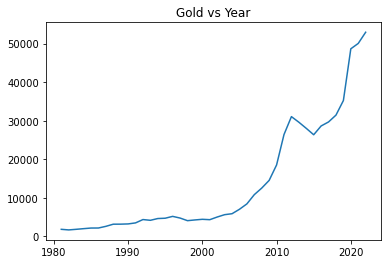

In [30]:
x1 = gs.Year
x2 = gs.Silver
y = gs.Gold
plt.title('Gold vs Year')
plt.plot(x1,y)
plt.show()

In [32]:
b0,b1,b2 = MultipleRegression(x1,x2,y)
print("Equation: y = ",b0,"+",b1,"*x1",b2,"*x2")

Equation: y =  -141.1289228828391 + -0.4942313991613354 *x1 0.7221120343093753 *x2


/tmp/ipykernel_8550/492306195.py:18: RuntimeWarning: overflow encountered in long_scalars
  b1 = ((x2squaresum*x1ysum) - (x1x2sum*x2ysum))/((x1squaresum*x2squaresum) - (x1x2sum)**2)


In [33]:
year = 2024
silver = 41880.52539680597
predict = b0 + b1*year + b2*silver
print("Gold price per gram in 2024 = ",predict/10)

Gold price per gram in 2024 =  2910.097811744764


In [34]:
npx1 = np.array(x1)
npx2 = np.array(x2)
npy = np.array(y)
predicted_vals = b0 + b1*npx1 + b2*npx2
residual = np.array(predicted_vals).reshape(-1,1) - npy
MSE = (residual**2).sum()/len(npx)
print('MSE = ',MSE)
RMSE = MSE**(1/2)
print('RMSE = ',RMSE)

MSE =  12492727204.215147
RMSE =  111770.86921114619
